# Project  ***Movie Analysis***

# 1. Overview

### .......................

## 2. Preprocess the data

In [1]:
# libraries: mathematical computing
import numpy as np
import pandas as pd

# libraries: pyspark SparkContext
from pyspark import SparkContext, SparkConf

# libraries: pyspark sql
from pyspark.sql.types import IntegerType, FloatType, DateType
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from  pyspark.sql.functions import monotonically_increasing_id, desc, row_number
from pyspark.sql import SQLContext

# libraries: visualization
import seaborn as sb
import matplotlib.pyplot as mpt
import functools
from collections import Counter
from ydata_profiling import ProfileReport


In [2]:
# Spark Builder

spark = SparkSession.builder.appName("movieAnalysis").getOrCreate()

In [3]:
spark

#### Now, let´s convert the .csv files into .parquet because they´re faster to analyze.

In [11]:
# convert the .csv file into .parquet
# table: movieDataset.csv

##df = spark.read.csv('movieDataset.csv', header=True)

##df.write.parquet('movieDataset.parquet')

##df_movies = spark.read.parquet('movieDataset.parquet')

In [115]:
df_movies = spark.read.csv('movieDataset.csv', header=True)
df_movies.show(50)

+------+--------------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    id|               title|vote_average|vote_count|  status|release_date|   revenue|runtime|adult|       backdrop_path|   budget|            homepage|  imdb_id|original_language|      original_title|            overview|          popularity|         poster_path|             tagline|              genres|production_companies|production_countries|    spoken_languages|            keywords|
+------+--------------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+--------------------+-----------------

In [116]:
df_movies.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- vote_count: string (nullable = true)
 |-- status: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: string (nullable = true)
 |-- runtime: string (nullable = true)
 |-- adult: string (nullable = true)
 |-- backdrop_path: string (nullable = true)
 |-- budget: string (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- keywords: string (nullabl

In [117]:
df_movies.count()

1052039

#### Let´s convert the string columns into integer and/or float columns

In [118]:
# convert string columns into integer columns

df_movies = df_movies.withColumn("id",df_movies["id"].cast(IntegerType()))

df_movies = df_movies.withColumn("vote_average",df_movies["vote_average"].cast(FloatType()))

df_movies = df_movies.withColumn("vote_count",df_movies["vote_count"].cast(FloatType()))

df_movies = df_movies.withColumn("release_date",df_movies["release_date"].cast(DateType()))

df_movies = df_movies.withColumn("revenue",df_movies["revenue"].cast(IntegerType()))

df_movies = df_movies.withColumn("runtime",df_movies["runtime"].cast(IntegerType()))

df_movies = df_movies.withColumn("budget",df_movies["budget"].cast(IntegerType()))

df_movies = df_movies.withColumn("popularity",df_movies["popularity"].cast(IntegerType()))

In [119]:
df_movies.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: float (nullable = true)
 |-- vote_count: float (nullable = true)
 |-- status: string (nullable = true)
 |-- release_date: date (nullable = true)
 |-- revenue: integer (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- adult: string (nullable = true)
 |-- backdrop_path: string (nullable = true)
 |-- budget: integer (nullable = true)
 |-- homepage: string (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- poster_path: string (nullable = true)
 |-- tagline: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- spoken_languages: string (nullable = true)
 |-- keywords: string (nullab

#### Let´s convert the .csv files into .parquet files to analyze the data faster.

In [20]:
# convert the .csv file into .parquet
# table: name.basics.tsv

df_name_basics = spark.read.format('csv').options(inferSchema=True,header = True, sep='\t').load('name.basics.tsv')
df_name_basics.write.parquet('name.basics.parquet')
df_name_basics = spark.read.parquet('name.basics.parquet')

In [21]:
df_name_basics.show(50)

+--------------------+-------------------+---------+--------------------+--------------------+--------------------+
|              nconst|        primaryName|birthYear|           deathYear|   primaryProfession|      knownForTitles|
+--------------------+-------------------+---------+--------------------+--------------------+--------------------+
|           nm0000001|       Fred Astaire|     1899|                1987|actor,miscellaneo...|tt0072308,tt00504...|
|           nm0000002|      Lauren Bacall|     1924|                2014|actress,soundtrac...|tt0037382,tt00752...|
|           nm0000003|    Brigitte Bardot|     1934|                  \N|actress,music_dep...|tt0057345,tt00491...|
|           nm0000004|       John Belushi|     1949|                1982|actor,writer,musi...|tt0072562,tt00779...|
|nm0000005   Ingma...|               1918|     2007|writer,director,a...|tt0050986,tt00839...|                NULL|
|           nm0000006|     Ingrid Bergman|     1915|                1982

In [22]:
df_name_basics.count()

13544746

In [26]:
#df_name_basics = spark.read.parquet('name.basics.parquet')
df_name_basics.show(50)

+---------+--------------------+---------+---------+--------------------+--------------------+
|   nconst|         primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+--------------------+---------+---------+--------------------+--------------------+
|nm1979452|        David Wexler|       \N|       \N|            director|           tt0387729|
|nm1979453|    Takeshi Tateishi|       \N|       \N|visual_effects,mi...|tt0208156,tt10951...|
|nm1979454|     Rodolfo Wellish|       \N|       \N|               actor|           tt0470111|
|nm1979455|        Glory Friend|       \N|       \N|            producer| tt0455581,tt0133302|
|nm1979456|       Michael Aaron|       \N|       \N|        actor,writer|tt0088568,tt04747...|
|nm1979457|         John Wilson|       \N|       \N|      art_department|           tt0465411|
|nm1979458|         Terese Gant|       \N|       \N|                  \N|                  \N|
|nm1979459|    Cristina Vecchio|       \N|       \

In [24]:
df_name_basics.count()

13544746

In [31]:
# convert the .csv file into .parquet
# table: title.akas.tsv

df_title_akas = spark.read.format('csv').options(inferSchema=True,header = True, sep='\t').load('title.akas.tsv')
df_title_akas.write.parquet('title.akas.parquet')
df_title_akas = spark.read.parquet('title.akas.parquet')

In [33]:
df_title_akas.show(5)

+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|  titleId|ordering|               title|region|language|      types|   attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|tt0000001|       1|          Carmencita|    \N|      \N|   original|           \N|              1|
|tt0000001|       2|          Carmencita|    DE|      \N|         \N|literal title|              0|
|tt0000001|       3|          Carmencita|    US|      \N|imdbDisplay|           \N|              0|
|tt0000001|       4|Carmencita - span...|    HU|      \N|imdbDisplay|           \N|              0|
|tt0000001|       5|          Καρμενσίτα|    GR|      \N|imdbDisplay|           \N|              0|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
only showing top 5 rows



In [34]:
df_title_akas.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- region: string (nullable = true)
 |-- language: string (nullable = true)
 |-- types: string (nullable = true)
 |-- attributes: string (nullable = true)
 |-- isOriginalTitle: integer (nullable = true)



In [35]:
df_title_akas.count()

48679363

In [56]:
# convert the .csv file into .parquet
# table: title.basics.tsv

df_title_basics = spark.read.format('csv').options(inferSchema=True,header = True, sep='\t').load('title.basics.tsv')
#df_title_basics.write.parquet('title.basics.parquet')
df_title_basics = spark.read.parquet('title.basics.parquet')

In [57]:
df_title_basics.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [37]:
df_title_basics.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)



In [48]:
# convert the .csv file into .parquet
# table: title.principals.tsv

df_title_principals = spark.read.format('csv').options(inferSchema=True,header = True, sep='\t').load('title.principals.tsv')
df_title_principals.write.parquet('title.principals.parquet')
df_title_principals = spark.read.parquet('title.principals.parquet')

In [38]:
df_title_principals.show(5)

+---------+--------+---------+---------------+--------------------+----------+
|   tconst|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows



In [39]:
df_title_principals.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)



In [41]:
df_title_principals.count()

86327850

In [41]:
# convert the .csv file into .parquet
# table: title.ratings.tsv

df_title_ratings = spark.read.format('csv').options(inferSchema=True,header = True, sep='\t').load('title.ratings.tsv')
#df_title_ratings.write.parquet('title.ratings.parquet')
df_title_ratings = spark.read.parquet('title.ratings.parquet')

In [42]:
df_title_ratings.show(5)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
|tt0000003|          6.5|    2023|
|tt0000004|          5.3|     180|
|tt0000005|          6.2|    2787|
+---------+-------------+--------+
only showing top 5 rows



In [43]:
df_title_ratings.printSchema()

root
 |-- tconst: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



In [44]:
df_title_ratings.count()

1446041

### 2.1 Future Engineering

In [120]:
# table: df_movies (another kaggle dataset)

df_movies.show(5)

+------+---------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+---------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    id|          title|vote_average|vote_count|  status|release_date|   revenue|runtime|adult|       backdrop_path|   budget|            homepage|  imdb_id|original_language| original_title|            overview|popularity|         poster_path|             tagline|              genres|production_companies|production_countries|    spoken_languages|            keywords|
+------+---------------+------------+----------+--------+------------+----------+-------+-----+--------------------+---------+--------------------+---------+-----------------+---------------+--------------------+----------+--------------------+--------------

#### Let´s drop off some columns.

In [121]:
df_movies = df_movies.drop('adult','backdrop_path','homepage','original_title','overview','poster_path','tagline','spoken_languages','keywords','production_companies','original_language','release_date','vote_count','status')

In [122]:
df_movies.show(5)

+------+---------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
|    id|          title|vote_average|   revenue|runtime|   budget|  imdb_id|popularity|              genres|production_countries|
+------+---------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
| 27205|      Inception|       8.364| 825532764|    148|160000000|tt1375666|      NULL|Your mind is the ...|Legendary Picture...|
|157336|   Interstellar|       8.417| 701729206|    169|165000000|tt0816692|       140|Adventure, Drama,...|United Kingdom, U...|
|   155|The Dark Knight|       8.512|1004558444|    152|185000000|tt0468569|       130|Drama, Action, Cr...|United Kingdom, U...|
| 19995|         Avatar|       7.573|      NULL|    162|237000000|tt0499549|        79|Action, Adventure...|United States of ...|
| 24428|   The Avengers|        7.71|1518815515|    143|220000000|tt0848228|        98|Sci

In [123]:
df_movies = df_movies.withColumnRenamed('imdb_id','titleId')

In [124]:
df_movies.show(5)

+------+---------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
|    id|          title|vote_average|   revenue|runtime|   budget|  titleId|popularity|              genres|production_countries|
+------+---------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
| 27205|      Inception|       8.364| 825532764|    148|160000000|tt1375666|      NULL|Your mind is the ...|Legendary Picture...|
|157336|   Interstellar|       8.417| 701729206|    169|165000000|tt0816692|       140|Adventure, Drama,...|United Kingdom, U...|
|   155|The Dark Knight|       8.512|1004558444|    152|185000000|tt0468569|       130|Drama, Action, Cr...|United Kingdom, U...|
| 19995|         Avatar|       7.573|      NULL|    162|237000000|tt0499549|        79|Action, Adventure...|United States of ...|
| 24428|   The Avengers|        7.71|1518815515|    143|220000000|tt0848228|        98|Sci

In [125]:
# here, we create a view of the dataframe

df_movies.createOrReplaceTempView('df_movies')

In [27]:
# table: name_basics

df_name_basics.show(5)

+---------+----------------+---------+---------+--------------------+--------------------+
|   nconst|     primaryName|birthYear|deathYear|   primaryProfession|      knownForTitles|
+---------+----------------+---------+---------+--------------------+--------------------+
|nm1979452|    David Wexler|       \N|       \N|            director|           tt0387729|
|nm1979453|Takeshi Tateishi|       \N|       \N|visual_effects,mi...|tt0208156,tt10951...|
|nm1979454| Rodolfo Wellish|       \N|       \N|               actor|           tt0470111|
|nm1979455|    Glory Friend|       \N|       \N|            producer| tt0455581,tt0133302|
|nm1979456|   Michael Aaron|       \N|       \N|        actor,writer|tt0088568,tt04747...|
+---------+----------------+---------+---------+--------------------+--------------------+
only showing top 5 rows



#### Let´s drop off some columns that are unnecessary.

In [28]:
df_name_basics = df_name_basics.drop('birthYear','deathYear','primaryProfession')

In [29]:
df_name_basics.show(5)

+---------+----------------+--------------------+
|   nconst|     primaryName|      knownForTitles|
+---------+----------------+--------------------+
|nm1979452|    David Wexler|           tt0387729|
|nm1979453|Takeshi Tateishi|tt0208156,tt10951...|
|nm1979454| Rodolfo Wellish|           tt0470111|
|nm1979455|    Glory Friend| tt0455581,tt0133302|
|nm1979456|   Michael Aaron|tt0088568,tt04747...|
+---------+----------------+--------------------+
only showing top 5 rows



In [62]:
df_name_basics.printSchema()

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- knownForTitles: string (nullable = true)



In [32]:
# table: title_akas

df_title_akas.show(5)

+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|  titleId|ordering|               title|region|language|      types|   attributes|isOriginalTitle|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
|tt0000001|       1|          Carmencita|    \N|      \N|   original|           \N|              1|
|tt0000001|       2|          Carmencita|    DE|      \N|         \N|literal title|              0|
|tt0000001|       3|          Carmencita|    US|      \N|imdbDisplay|           \N|              0|
|tt0000001|       4|Carmencita - span...|    HU|      \N|imdbDisplay|           \N|              0|
|tt0000001|       5|          Καρμενσίτα|    GR|      \N|imdbDisplay|           \N|              0|
+---------+--------+--------------------+------+--------+-----------+-------------+---------------+
only showing top 5 rows



In [33]:
df_title_akas.count()

48679363

#### Let´s drop off some columns that are unnecessary.

In [63]:
df_title_akas = df_title_akas.drop('language','types','attributes','isOriginalTitle')

df_title_akas.show(5)

+---------+--------+--------------------+------+
|  titleId|ordering|               title|region|
+---------+--------+--------------------+------+
|tt0000001|       1|          Carmencita|    \N|
|tt0000001|       2|          Carmencita|    DE|
|tt0000001|       3|          Carmencita|    US|
|tt0000001|       4|Carmencita - span...|    HU|
|tt0000001|       5|          Καρμενσίτα|    GR|
+---------+--------+--------------------+------+
only showing top 5 rows



In [91]:
df_title_akas.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- region: string (nullable = true)



In [36]:
df_title_akas.createOrReplaceTempView('title_akas')

In [37]:
results = spark.sql('''select * from title_akas''')

In [38]:
results.show()

+---------+--------+--------------------+------+---------------+
|  titleId|ordering|               title|region|isOriginalTitle|
+---------+--------+--------------------+------+---------------+
|tt0000001|       1|          Carmencita|    \N|              1|
|tt0000001|       2|          Carmencita|    DE|              0|
|tt0000001|       3|          Carmencita|    US|              0|
|tt0000001|       4|Carmencita - span...|    HU|              0|
|tt0000001|       5|          Καρμενσίτα|    GR|              0|
|tt0000001|       6|          Карменсита|    RU|              0|
|tt0000001|       7|          Карменсіта|    UA|              0|
|tt0000001|       8|      カルメンチータ|    JP|              0|
|tt0000002|       1|Le clown et ses c...|    \N|              1|
|tt0000002|       2|   A bohóc és kutyái|    HU|              0|
|tt0000002|       3|Clovnul si cainii...|    RO|              0|
|tt0000002|       4|Der Clown und sei...|    DE|              0|
|tt0000002|       5|Le clown et 

In [39]:
results.count()

48679363

In [43]:
# table: title_ratings

df_title_ratings.show(5)

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
|tt0000003|          6.5|    2023|
|tt0000004|          5.3|     180|
|tt0000005|          6.2|    2787|
+---------+-------------+--------+
only showing top 5 rows



In [44]:
df_title_ratings = df_title_ratings.withColumnRenamed('tconst','titleId')

df_title_ratings.show(5)

+---------+-------------+--------+
|  titleId|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
|tt0000003|          6.5|    2023|
|tt0000004|          5.3|     180|
|tt0000005|          6.2|    2787|
+---------+-------------+--------+
only showing top 5 rows



In [92]:
df_title_ratings.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- averageRating: double (nullable = true)
 |-- numVotes: integer (nullable = true)



In [45]:
df_title_ratings.count()

1446041

In [46]:
df_title_ratings.createOrReplaceTempView('ratings')

In [47]:
results = spark.sql('select AVG(averageRating) AS total_avg_rating from ratings')

results.show(5)

+------------------+
|  total_avg_rating|
+------------------+
|6.9615692777728935|
+------------------+



In [49]:
# table: title_principals

df_title_principals.show(5)

+---------+--------+---------+---------------+--------------------+----------+
|   tconst|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows



#### Let´s rename a column.

In [50]:
df_title_principals = df_title_principals.withColumnRenamed('tconst','titleId')

df_title_principals.show(5)

+---------+--------+---------+---------------+--------------------+----------+
|  titleId|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows



In [51]:
df_title_principals.show(5)

+---------+--------+---------+---------------+--------------------+----------+
|  titleId|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
+---------+--------+---------+---------------+--------------------+----------+
only showing top 5 rows



#### Let´s drop off some columns that are unnecessary.

In [52]:
df_title_principals = df_title_principals.drop('characters','job')

In [53]:
df_title_principals.show(5)

+---------+--------+---------+---------------+
|  titleId|ordering|   nconst|       category|
+---------+--------+---------+---------------+
|tt0000001|       1|nm1588970|           self|
|tt0000001|       2|nm0005690|       director|
|tt0000001|       3|nm0005690|       producer|
|tt0000001|       4|nm0374658|cinematographer|
|tt0000002|       1|nm0721526|       director|
+---------+--------+---------+---------------+
only showing top 5 rows



In [93]:
df_title_principals.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- ordering: integer (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)



In [54]:
df_title_principals.createOrReplaceTempView('principals')

In [89]:
join = spark.sql('select averageRating,genre from ratings as r INNER JOIN principals p ON r.titleId = p.titleId')

In [ ]:
join.show(5)

In [95]:
join = spark.sql('select title,averageRating from title_akas AS a INNER JOIN ratings r ON a.titleId = r.titleId')

In [96]:
join.show(5)

+--------------------+-------------+
|               title|averageRating|
+--------------------+-------------+
|          Carmencita|          5.7|
|          Carmencita|          5.7|
|          Carmencita|          5.7|
|Carmencita - span...|          5.7|
|          Καρμενσίτα|          5.7|
+--------------------+-------------+
only showing top 5 rows



In [58]:
# table: title_basics

df_title_basics.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

In [59]:
df_title_basics = df_title_basics.withColumnRenamed('tconst','titleId')

df_title_basics.show(5)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|  titleId|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation,Short|
|tt0000003|    short|      Pauvre Pierrot|      Pauvre Pierrot|      0|     1892|     \N|             5|Animation,Comedy,...|
|tt0000004|    short|         Un bon bock|         Un bon bock|      0|     1892|     \N|            12|     Animation,Short|
|tt0000005|    short|    Blacksmith Scene|    Blacksmith Scene|      0|     1893|     \N|             1|        Comedy

#### Let´s drop off a column.

In [95]:
df_title_basics = df_title_basics.drop('originalTitle','isAdult','startYear','endYear','titleType')

In [96]:
df_title_basics.show(5)

+---------+--------------------+--------------+--------------------+
|  titleId|        primaryTitle|runtimeMinutes|              genres|
+---------+--------------------+--------------+--------------------+
|tt0000001|          Carmencita|             1|   Documentary,Short|
|tt0000002|Le clown et ses c...|             5|     Animation,Short|
|tt0000003|      Pauvre Pierrot|             5|Animation,Comedy,...|
|tt0000004|         Un bon bock|            12|     Animation,Short|
|tt0000005|    Blacksmith Scene|             1|        Comedy,Short|
+---------+--------------------+--------------+--------------------+
only showing top 5 rows



In [97]:
df_title_basics.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)



#### Let´s change the type of the column "runtimeMinutes".

In [98]:
df_title_basics = df_title_basics.withColumn("runtimeMinutes",df_title_basics["runtimeMinutes"].cast(IntegerType()))


In [99]:
df_title_basics.printSchema()

root
 |-- titleId: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)



In [100]:
df_title_basics.createOrReplaceTempView('title_basics')

In [101]:
results = spark.sql("select * from title_basics")
results.show()

+---------+--------------------+--------------+--------------------+
|  titleId|        primaryTitle|runtimeMinutes|              genres|
+---------+--------------------+--------------+--------------------+
|tt0000001|          Carmencita|             1|   Documentary,Short|
|tt0000002|Le clown et ses c...|             5|     Animation,Short|
|tt0000003|      Pauvre Pierrot|             5|Animation,Comedy,...|
|tt0000004|         Un bon bock|            12|     Animation,Short|
|tt0000005|    Blacksmith Scene|             1|        Comedy,Short|
|tt0000006|   Chinese Opium Den|             1|               Short|
|tt0000007|Corbett and Court...|             1|         Short,Sport|
|tt0000008|Edison Kinetoscop...|             1|   Documentary,Short|
|tt0000009|          Miss Jerry|            45|             Romance|
|tt0000010| Leaving the Factory|             1|   Documentary,Short|
|tt0000011|Akrobatisches Pot...|             1|   Documentary,Short|
|tt0000012|The Arrival of a ...|  

### 2.2 Data Cleaning

#### Let´s take a look at the tables until now.

In [126]:
### table: df_movies

df_movies.show(10)

+------+--------------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
|    id|               title|vote_average|   revenue|runtime|   budget|  titleId|popularity|              genres|production_countries|
+------+--------------------+------------+----------+-------+---------+---------+----------+--------------------+--------------------+
| 27205|           Inception|       8.364| 825532764|    148|160000000|tt1375666|      NULL|Your mind is the ...|Legendary Picture...|
|157336|        Interstellar|       8.417| 701729206|    169|165000000|tt0816692|       140|Adventure, Drama,...|United Kingdom, U...|
|   155|     The Dark Knight|       8.512|1004558444|    152|185000000|tt0468569|       130|Drama, Action, Cr...|United Kingdom, U...|
| 19995|              Avatar|       7.573|      NULL|    162|237000000|tt0499549|        79|Action, Adventure...|United States of ...|
| 24428|        The Avengers|        7.71|1518815515|  

In [106]:
df_movies.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: float (nullable = true)
 |-- vote_count: float (nullable = true)
 |-- status: string (nullable = true)
 |-- revenue: integer (nullable = true)
 |-- runtime: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- titleId: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_countries: string (nullable = true)



In [127]:
df_movies.count()

1052039

In [128]:
# drop duplicated and null values

df_movies.dropDuplicates()
df_movies.na.drop(how="any").show(truncate=False)

DataFrame[id: int, title: string, vote_average: float, revenue: int, runtime: int, budget: int, titleId: string, popularity: int, genres: string, production_countries: string]

In [134]:
### table: df_title_akas

df_title_akas.show(10)

+---------+--------+--------------------+------+
|  titleId|ordering|               title|region|
+---------+--------+--------------------+------+
|tt0000001|       1|          Carmencita|    \N|
|tt0000001|       2|          Carmencita|    DE|
|tt0000001|       3|          Carmencita|    US|
|tt0000001|       4|Carmencita - span...|    HU|
|tt0000001|       5|          Καρμενσίτα|    GR|
|tt0000001|       6|          Карменсита|    RU|
|tt0000001|       7|          Карменсіта|    UA|
|tt0000001|       8|      カルメンチータ|    JP|
|tt0000002|       1|Le clown et ses c...|    \N|
|tt0000002|       2|   A bohóc és kutyái|    HU|
+---------+--------+--------------------+------+
only showing top 10 rows



In [135]:
df_title_akas.count()

48679363

In [136]:
# drop duplicated and null values

df_title_akas.dropDuplicates()
df_title_akas.na.drop(how="any").show(truncate=False)

+---------+--------+-------------------------+------+
|titleId  |ordering|title                    |region|
+---------+--------+-------------------------+------+
|tt0000001|1       |Carmencita               |\N    |
|tt0000001|2       |Carmencita               |DE    |
|tt0000001|3       |Carmencita               |US    |
|tt0000001|4       |Carmencita - spanyol tánc|HU    |
|tt0000001|5       |Καρμενσίτα               |GR    |
|tt0000001|6       |Карменсита               |RU    |
|tt0000001|7       |Карменсіта               |UA    |
|tt0000001|8       |カルメンチータ           |JP    |
|tt0000002|1       |Le clown et ses chiens   |\N    |
|tt0000002|2       |A bohóc és kutyái        |HU    |
|tt0000002|3       |Clovnul si cainii sai    |RO    |
|tt0000002|4       |Der Clown und seine Hunde|DE    |
|tt0000002|5       |Le clown et ses chiens   |FR    |
|tt0000002|6       |The Clown and His Dogs   |US    |
|tt0000002|7       |Клоун и его собаки       |RU    |
|tt0000002|8       |道化師と犬          

In [137]:
df_title_akas.count()

48679363

In [138]:
### table: df_title_ratings

df_title_ratings.show(10)

+---------+-------------+--------+
|  titleId|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
|tt0000003|          6.5|    2023|
|tt0000004|          5.3|     180|
|tt0000005|          6.2|    2787|
|tt0000006|          5.1|     187|
|tt0000007|          5.4|     872|
|tt0000008|          5.4|    2202|
|tt0000009|          5.4|     212|
|tt0000010|          6.8|    7594|
+---------+-------------+--------+
only showing top 10 rows



In [139]:
# drop duplicated and null values

df_title_ratings.dropDuplicates()
df_title_ratings.na.drop(how="any").show(truncate=False)

+---------+-------------+--------+
|titleId  |averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|5.7          |2059    |
|tt0000002|5.6          |277     |
|tt0000003|6.5          |2023    |
|tt0000004|5.3          |180     |
|tt0000005|6.2          |2787    |
|tt0000006|5.1          |187     |
|tt0000007|5.4          |872     |
|tt0000008|5.4          |2202    |
|tt0000009|5.4          |212     |
|tt0000010|6.8          |7594    |
|tt0000011|5.2          |389     |
|tt0000012|7.4          |12928   |
|tt0000013|5.7          |1973    |
|tt0000014|7.1          |5874    |
|tt0000015|6.1          |1184    |
|tt0000016|5.9          |1584    |
|tt0000017|4.6          |348     |
|tt0000018|5.2          |629     |
|tt0000019|5.1          |32      |
|tt0000020|4.7          |383     |
+---------+-------------+--------+
only showing top 20 rows



In [140]:
df_title_ratings.count()

1446041

## 3. Exploratory Data Analysis (EDA)

In [141]:
# definition of the "histogram" function

def histogram(df, col, bins=10, xname=None, yname=None):
    
    '''
    This function makes a histogram from spark dataframe named 
    df for column name col. 
    '''
    
    # Calculating histogram in Spark 
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)

    # Preprocessing histogram points and locations 
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
    
    # Making a bar plot 
    mpt.bar(loc, vals[1], width=width)
    mpt.xlabel(col)
    mpt.ylabel(yname)
    mpt.show()

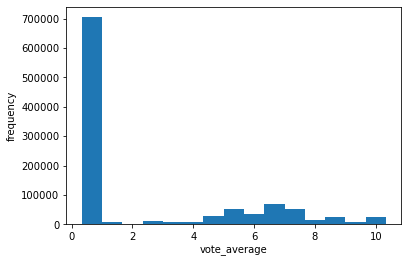

In [143]:
## table: df_movies

histogram(df_movies,'vote_average',bins=15, yname='frequency')

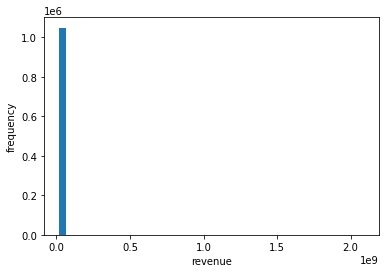

In [163]:
histogram(df_movies,'revenue',bins=50, yname='frequency')

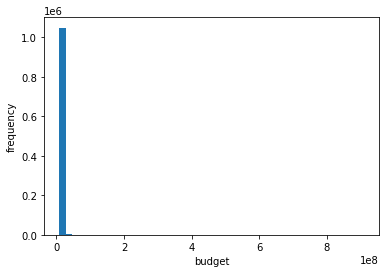

In [162]:
histogram(df_movies,'budget',bins=50, yname='frequency')

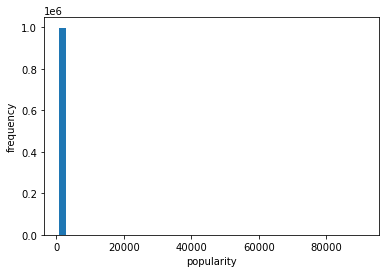

In [159]:
histogram(df_movies,'popularity',bins=50, yname='frequency')

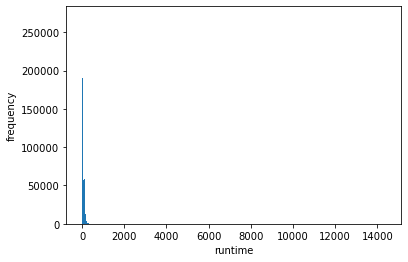

In [155]:
histogram(df_movies,'runtime',bins=1000, yname='frequency')

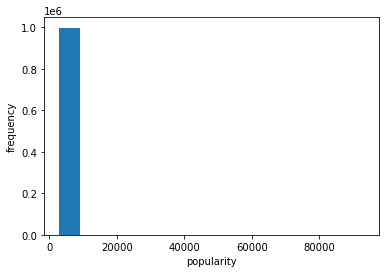

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 50825)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/anaconda3/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/opt/anaconda3/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/anaconda3/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/opt/anaconda3/lib/python3.11/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/opt/anaconda3/lib/python3.11/site-packages/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
                           ^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-pac

In [46]:
histogram(df_movies,'popularity',bins=15, yname='frequency')

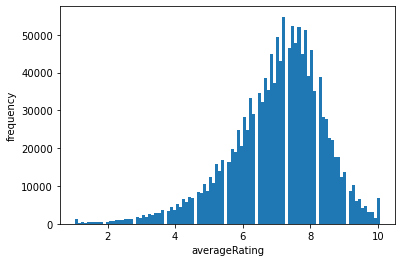

In [170]:
## table: df_title_ratings

histogram(df_title_ratings,'averageRating',bins=100, yname='frequency')

#### Let´s analyze the table "df_movies" using SparkSQL.

In [182]:
genresDist = spark.sql("SELECT COUNT(DISTINCT(genres)) FROM df_movies") 
genresDist.show(10)

+----------------------+
|count(DISTINCT genres)|
+----------------------+
|                 45229|
+----------------------+



In [184]:
type(genresDist)

pyspark.sql.dataframe.DataFrame

In [185]:
df_title_ratings.show(5)

+---------+-------------+--------+
|  titleId|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
|tt0000003|          6.5|    2023|
|tt0000004|          5.3|     180|
|tt0000005|          6.2|    2787|
+---------+-------------+--------+
only showing top 5 rows



In [202]:
df_movies.count()

1052039

In [186]:
df_movies.show(2)

+------+------------+------------+---------+-------+---------+---------+----------+--------------------+--------------------+
|    id|       title|vote_average|  revenue|runtime|   budget|  titleId|popularity|              genres|production_countries|
+------+------------+------------+---------+-------+---------+---------+----------+--------------------+--------------------+
| 27205|   Inception|       8.364|825532764|    148|160000000|tt1375666|      NULL|Your mind is the ...|Legendary Picture...|
|157336|Interstellar|       8.417|701729206|    169|165000000|tt0816692|       140|Adventure, Drama,...|United Kingdom, U...|
+------+------------+------------+---------+-------+---------+---------+----------+--------------------+--------------------+
only showing top 2 rows



In [369]:
query = spark.sql("select genres,title from df_movies")

In [370]:
query.show()

+--------------------+--------------------+
|              genres|               title|
+--------------------+--------------------+
|Your mind is the ...|           Inception|
|Adventure, Drama,...|        Interstellar|
|Drama, Action, Cr...|     The Dark Knight|
|Action, Adventure...|              Avatar|
|Science Fiction, ...|        The Avengers|
|Action, Adventure...|            Deadpool|
|Adventure, Action...|Avengers: Infinit...|
|Mischief. Mayhem....|          Fight Club|
|Action, Science F...|Guardians of the ...|
|     Thriller, Crime|        Pulp Fiction|
|Comedy, Drama, Ro...|        Forrest Gump|
|  Adventure, Fantasy|Harry Potter and ...|
|Action, Science F...|            Iron Man|
|      Drama, Western|    Django Unchained|
|        Drama, Crime|The Shawshank Red...|
|Adventure, Scienc...|   Avengers: Endgame|
|Action, Science F...|          The Matrix|
|      Drama, Romance|             Titanic|
|Crime, Thriller, ...|               Joker|
|Adventure, Fantas...|The Lord o

In [197]:
# genre: Action

Action = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='Action' ")
avg_Action = Action.agg({'vote_average':'avg'})

In [211]:
avg_Action = Action.agg({'vote_average':'avg'})

In [213]:
avg_Action.show()

+-----------------+
|avg(vote_average)|
+-----------------+
|2.394578823837241|
+-----------------+



In [363]:
# genre: Comedy

Comedy = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='Comedy' ")
avg_Comedy = Comedy.agg({'vote_average':'avg'})

In [364]:
avg_Comedy.show()

+-----------------+
|avg(vote_average)|
+-----------------+
|2.750109684860086|
+-----------------+



In [374]:
# genre: Drama

Drama = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='Drama' ")
avg_Drama = Drama.agg({'vote_average':'avg'})
avg_Drama.show()

+-----------------+
|avg(vote_average)|
+-----------------+
|2.304220381021451|
+-----------------+



In [375]:
# genre: Documentary

Documentary = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='Documentary' ")
avg_Documentary = Documentary.agg({'vote_average':'avg'})
avg_Documentary.show()

+------------------+
| avg(vote_average)|
+------------------+
|1.8782346411516733|
+------------------+



In [377]:
# genre: War

War = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='War' ")
avg_War = War.agg({'vote_average':'avg'})
avg_War.show()

+-----------------+
|avg(vote_average)|
+-----------------+
| 2.53427092973576|
+-----------------+



In [379]:
# genre: Crime

Crime = spark.sql("SELECT title, vote_average, genres from df_movies where genres ='Crime' ")
avg_Crime = Crime.agg({'vote_average':'avg'})
avg_Crime.show()

+------------------+
| avg(vote_average)|
+------------------+
|2.1072058336983366|
+------------------+



In [401]:
# genre: Crime

result = spark.sql("SELECT COUNT(numVotes) from ratings ")
result.show()

+---------------+
|count(numVotes)|
+---------------+
|        1446041|
+---------------+



+-----------------+
|avg(vote_average)|
+-----------------+
|             NULL|
+-----------------+



#### Let´s try to switch to a more friendly library for graphics such as pandas or seaborn.

In [282]:
## table: df_movies

df_movies_pd = df_movies.to_pandas_on_spark()

/opt/anaconda3/lib/python3.11/site-packages/pyspark/sql/dataframe.py:5723: FutureWarning:

DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.



In [172]:
type(df_movies)

pyspark.sql.dataframe.DataFrame

In [217]:
df_movies_pd.head(2)

,id,title,vote_average,revenue,runtime,budget,titleId,popularity,genres,production_countries
0,27205,Inception,8.364,825532764,148,160000000,tt1375666,NaN,Your mind is the scene of the crime.,"Legendary Pictures, Syncopy, Warner Bros. Pict..."
1,157336,Interstellar,8.417,701729206,169,165000000,tt0816692,140.0,"Adventure, Drama, Science Fiction","United Kingdom, United States of America"


In [218]:
df_movies_pd.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 1052039 entries, 0 to 1052038
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1052039 non-null  int32  
 1   title                 1052027 non-null  object 
 2   vote_average          1051919 non-null  float32
 3   revenue               1051922 non-null  int32  
 4   runtime               1052009 non-null  int32  
 5   budget                1051926 non-null  int32  
 6   titleId               584324 non-null   object 
 7   popularity            998268 non-null   int32  
 8   genres                656821 non-null   object 
 9   production_countries  612745 non-null   object 
dtypes: float32(1), int32(5), object(4)

In [345]:
df_movies_pd = df_movies.toPandas()

<Axes: >

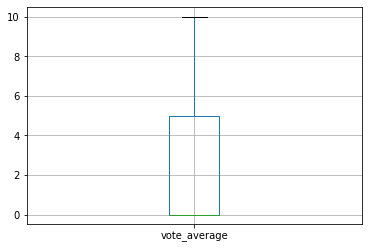

In [346]:
df_movies_pd.boxplot(column=['vote_average'])

In [ ]:
df_movies_pd.boxplot(column=['runtime'], by=['genres'])

<Axes: >

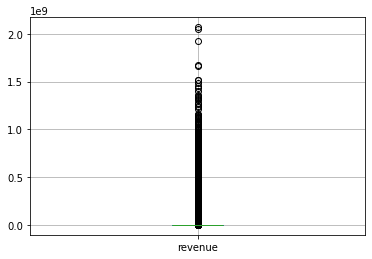

In [347]:
df_movies_pd.boxplot(column=['revenue'])

array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

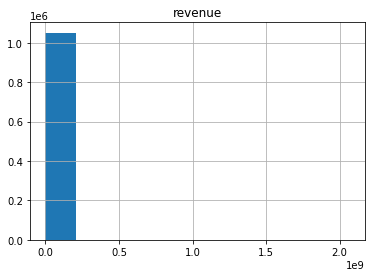

In [348]:
df_movies_pd.hist(['revenue'])

<Axes: >

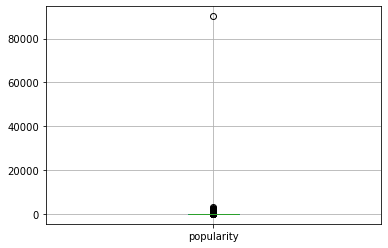

In [349]:
df_movies_pd.boxplot(column=['popularity'])

In [350]:
value = df_movies_pd['popularity']


In [351]:
Q1 = df_movies_pd['popularity'].quantile(0.25)
Q3 = df_movies_pd['popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_movies_pd_new = df_movies_pd[(df_movies_pd['popularity'] >= lower_bound) & (df_movies_pd['popularity'] <= upper_bound)]

<Axes: >

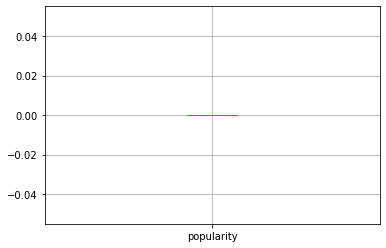

In [352]:
df_movies_pd_new.boxplot(['popularity'])

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

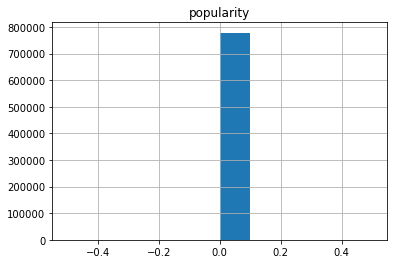

In [353]:
df_movies_pd_new.hist(['popularity'])

In [309]:
Q1 = value.quantile(.25)
Q3 = value.quantile(.75)
RIQ = Q3 - Q1
lower_limit = Q1 - 1.5 * RIQ
higher_limit = Q3 + 1.5 * RIQ

In [ ]:
selecction = (value >)

In [354]:
def fix_outliers(df:pd.DataFrame, column:str):
    value = df[f"{column}"]
    Q1 = value.quantile(.25)
    Q3 = value.quantile(.75)
    RIQ = Q3 - Q1
    lower_limit = Q1 - 1.5*RIQ
    higher_limit = Q3 + 1.5*RIQ
    selecction = (value >= lower_limit) & (value <= higher_limit)
    df = df[selecction]

    return df

#value = df_movies_pd['popularity']
#Q1 = value.quantile(.25)
#Q3 = value.quantile(.75)
#RIQ = Q3 - Q1
#lower_limit = Q1 - 1.5*RIQ
#higher_limit = Q3 + 1.5*RIQ

<Axes: >

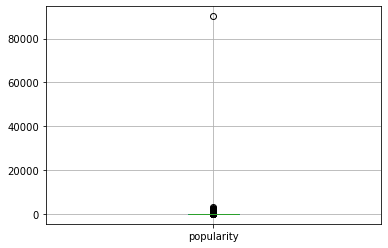

In [355]:
df_movies_pd.boxplot(column=['popularity'])

In [356]:
df_movies_pd_new = fix_outliers(df_movies_pd,'popularity')

<Axes: >

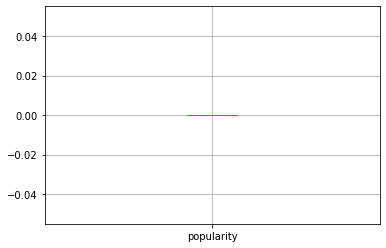

In [357]:
df_movies_pd_new.boxplot(column=['popularity'])

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

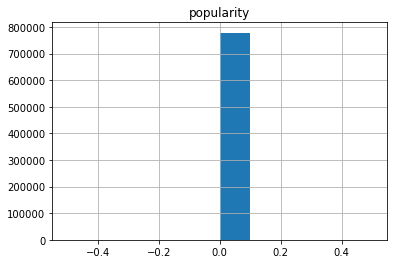

In [358]:
df_movies_pd_new.hist('popularity')

<Axes: >

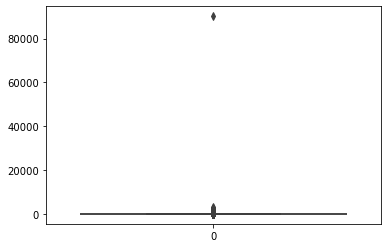

In [317]:
#sb.boxplot(df_movies_pd['popularity'])

array([[<Axes: title={'center': 'popularity'}>]], dtype=object)

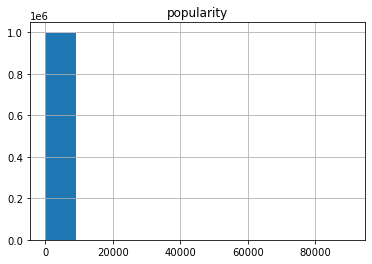

In [303]:
df_movies_pd.hist(['popularity'])

In [304]:
df_movies_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052039 entries, 0 to 1052038
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1052039 non-null  int32  
 1   title                 1052027 non-null  object 
 2   vote_average          1051919 non-null  float32
 3   revenue               1051922 non-null  float64
 4   runtime               1052009 non-null  float64
 5   budget                1051926 non-null  float64
 6   titleId               584324 non-null   object 
 7   popularity            998268 non-null   float64
 8   genres                656821 non-null   object 
 9   production_countries  612745 non-null   object 
dtypes: float32(1), float64(4), int32(1), object(4)
memory usage: 72.2+ MB


<Axes: >

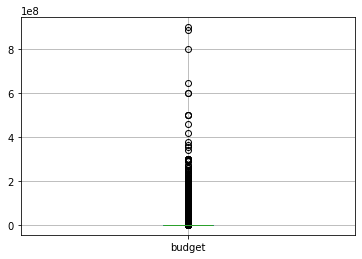

In [359]:
df_movies_pd.boxplot(column=['budget'])

In [360]:
df_movies_pd_new = fix_outliers(df_movies_pd,'budget')

<Axes: >

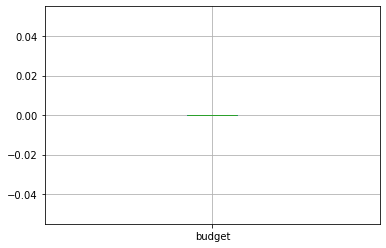

In [362]:
df_movies_pd_new.boxplot(column=['budget'])

In [361]:
sb.boxplot(df_movies_pd_new['budget'])

KeyError: 0

In [293]:
df_movies_pd = fix_outliers(df_movies_pd,'budget')

<Axes: >

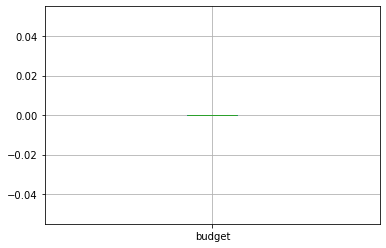

In [294]:
df_movies_pd.boxplot(column=['budget'])

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

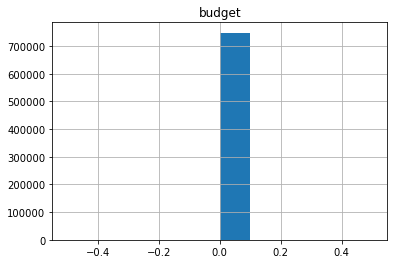

In [295]:
df_movies_pd.hist(['budget'])

In [247]:
## table: df_title_ratings

df_title_ratings_pd = df_title_ratings.toPandas()

In [248]:
type(df_title_ratings_pd)

pandas.core.frame.DataFrame

<Axes: >

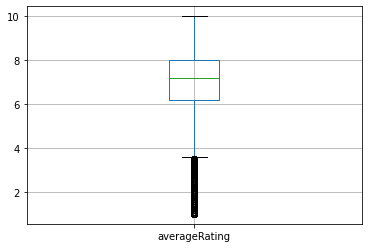

In [340]:
df_title_ratings_pd.boxplot(column=['averageRating'])


In [325]:
df_title_ratings_pd_new = fix_outliers(df_title_ratings_pd,'averageRating')

In [341]:
type(df_title_ratings_pd_new)

pandas.core.frame.DataFrame

<Axes: >

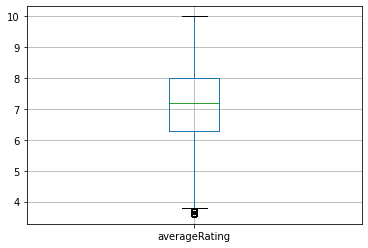

In [342]:
df_title_ratings_pd_new.boxplot(column = ['averageRating'])

array([[<Axes: title={'center': 'averageRating'}>]], dtype=object)

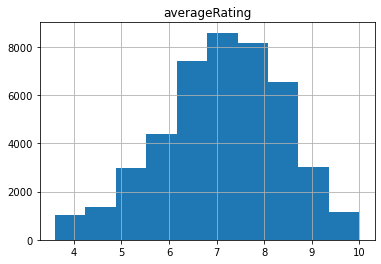

In [343]:
df_title_ratings_pd_new.hist(['averageRating'])

In [329]:
df_title_ratings_pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44631 entries, 492 to 1445937
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titleId        44631 non-null  object 
 1   averageRating  44631 non-null  float64
 2   numVotes       44631 non-null  int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 1.2+ MB


<Axes: >

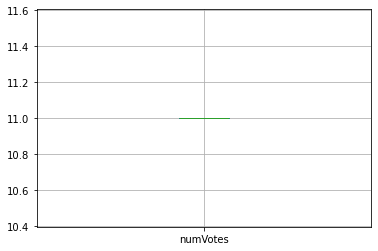

In [344]:
df_title_ratings_pd.boxplot(column=['numVotes'])

In [273]:
df_title_ratings_pd = fix_outliers(df_title_ratings_pd,'numVotes')

<Axes: >

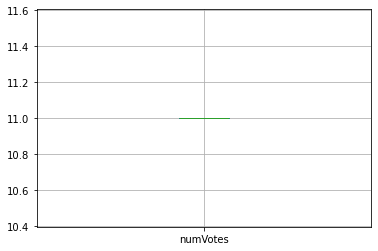

In [274]:
df_title_ratings_pd.boxplot(column=['numVotes'])

array([[<Axes: title={'center': 'numVotes'}>]], dtype=object)

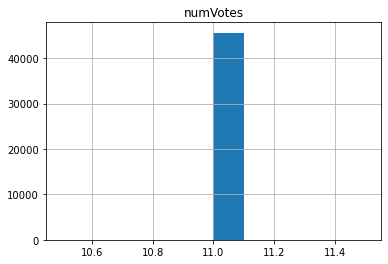

In [275]:
df_title_ratings_pd.hist(['numVotes'])

<Axes: >

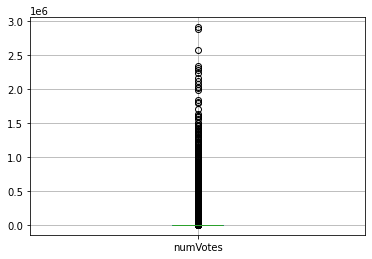

In [270]:
df_title_ratings_pd.boxplot(column=['numVotes'])

In [402]:
df_title_basics.createOrReplaceTempView('title_basics')

In [405]:
df_title_basics.show(2)

+---------+--------------------+--------------+-----------------+
|  titleId|        primaryTitle|runtimeMinutes|           genres|
+---------+--------------------+--------------+-----------------+
|tt0000001|          Carmencita|             1|Documentary,Short|
|tt0000002|Le clown et ses c...|             5|  Animation,Short|
+---------+--------------------+--------------+-----------------+
only showing top 2 rows



In [406]:
type(df_title_basics)

pyspark.sql.dataframe.DataFrame

In [404]:
df_title_ratings.show(2)

+---------+-------------+--------+
|  titleId|averageRating|numVotes|
+---------+-------------+--------+
|tt0000001|          5.7|    2059|
|tt0000002|          5.6|     277|
+---------+-------------+--------+
only showing top 2 rows



In [ ]:
union = 

In [263]:
df_title_ratings_pd[df_title_ratings_pd['numVotes'] >= 2500000]

,titleId,averageRating,numVotes
83781,tt0111161,9.3,2904305
904372,tt1375666,8.8,2564018
975653,tt0468569,9.0,2885458


## 4. Business Questions

## First question: ***What is the evolution of the rating per content?***

## Second question: ***What is the average rating per genre?***

## Third question: ***What are the genres which provide the highest ROI?***

## Fourth question: ***What are the countries with the highest production of content?***

## Fifth question: ***What is your recommendation for the client?***